<a href="https://colab.research.google.com/github/ybarrientos13/data/blob/main/Energetic%20efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Este notebook guía al estudiante en el análisis de datasets  públicos, donde deberá aplicar técnicas de regresión lineal.

## 📌 Instrucciones Generales
Para cada uno de los siguientes datasets:

1. **Describe** brevemente el problema y el significado de las variables, identifica su tipo (en caso de no poder usar variables categóricas, eliminalas para la construcción del modelo).
2. **Haz un análisis descriptivo** de los datos (estadísticas, correlaciones, gráficos).
3. **Verifica la existencia de outliers extremos**.
4. **Realiza una regresión lineal** simple o múltiple, justificando tu elección.
5. **Evalúa el desempeño del modelo** usando métricas apropiadas sobre datos de testeo.

Para esto descarga y sube los archivos a una cuenta de github que deberás crear.

## 📁 Dataset 2: Energetic Efficiency

In [54]:
# Cargar y visualizar datos
import pandas as pd
url = "https://raw.githubusercontent.com/ybarrientos13/Entregable---Datos-1/refs/heads/main/Copia%20de%20ENB2012_data.csv"
df = df.iloc[:, :9]
df.columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "Y1", "Y2"]
df.head()

,X1,X2,X3,X4,X5,X6,X7,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84


## 🔍 Paso 1: Descripción del problema y las variables

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

## 📊 Paso 2: Análisis descriptivo

In [55]:

print("Tamaño del dataset:  filas", df.shape[0], "colmnas: ", df.shape[1])
df.head(10)
dimensiones = df.shape
print(f"El dataset tiene {dimensiones[0]} filas y {dimensiones[1]} columnas")
df.describe()

Tamaño del dataset:  filas 768 colmnas:  9
El dataset tiene 768 filas y 9 columnas


,X1,X2,X3,X4,X5,X6,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


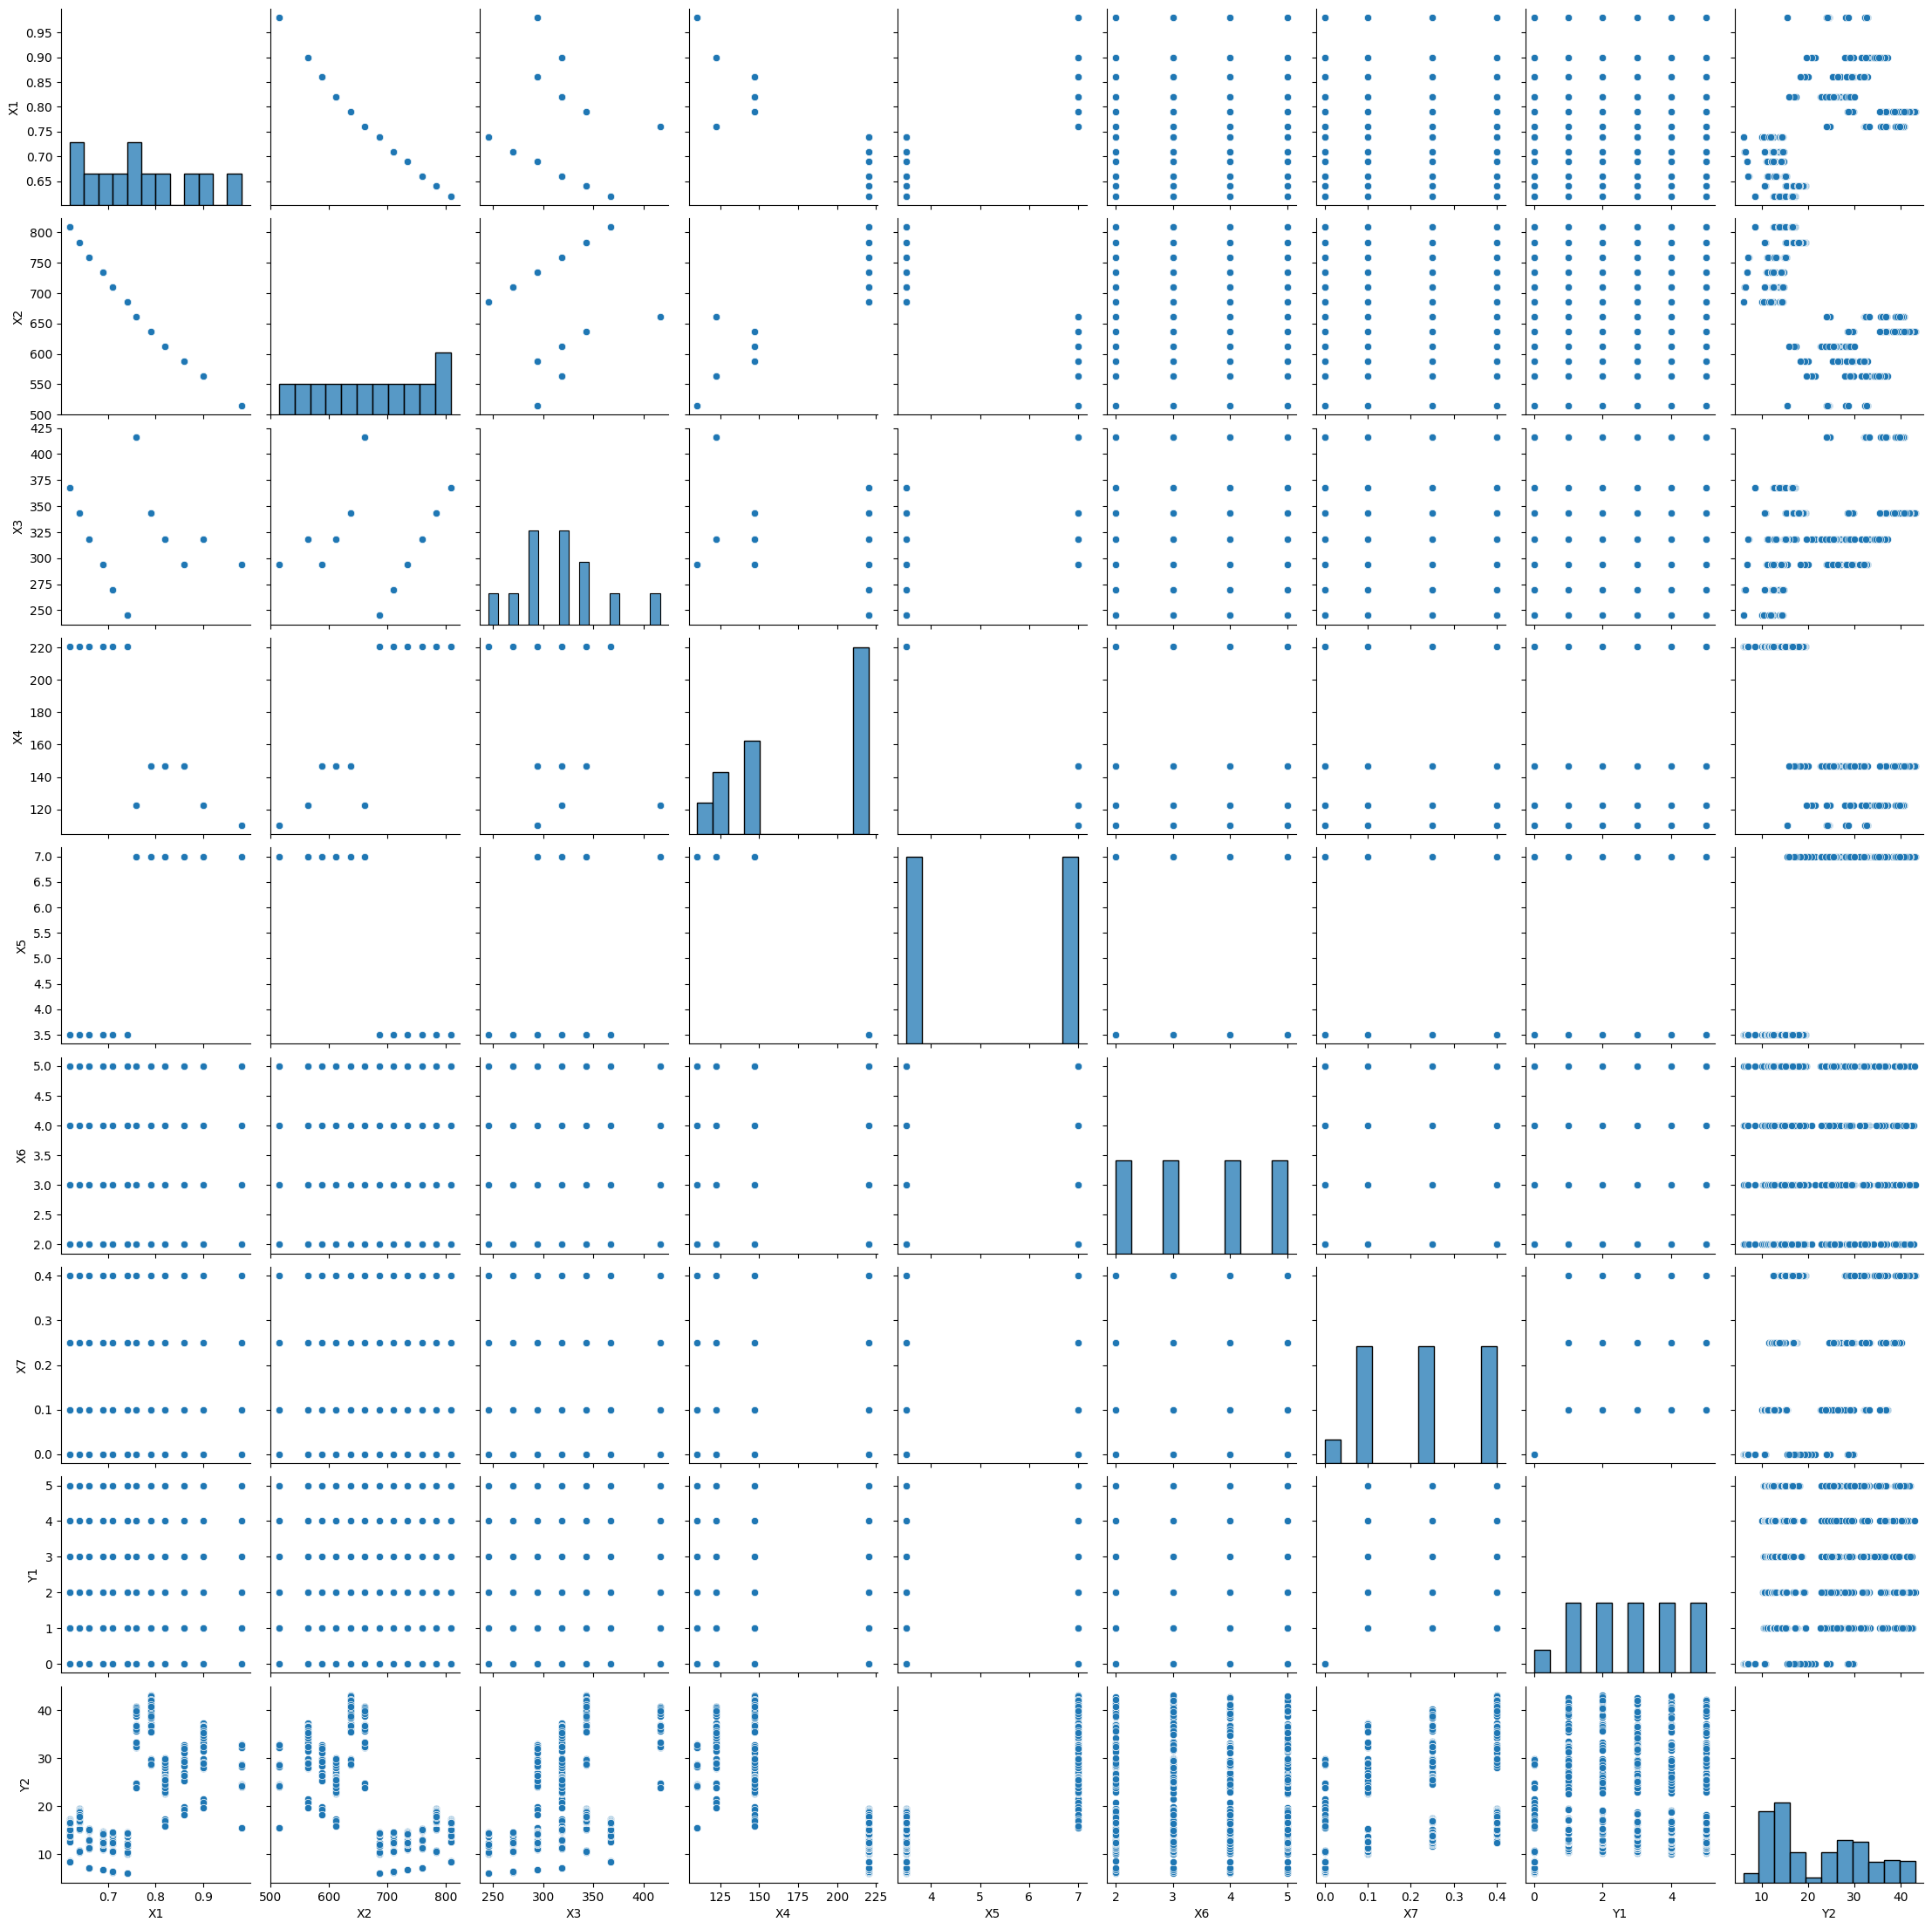

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

## ⚠️ Paso 3: Detección de outliers extremos

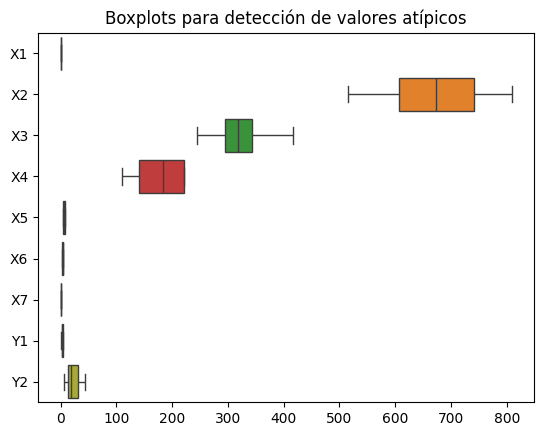

In [57]:
sns.boxplot(data=df, orient='h')
plt.title("Boxplots para detección de valores atípicos")
plt.show()

## 📈 Paso 4: Regresión Lineal

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop("Y1", axis=1)
y = df["Y1"]

# Eliminar o imputar valores faltantes
X = X.fillna(X.mean())
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 🧪 Paso 5: Evaluación del modelo

R²: 0.025446409016707583
MSE: 2.466733031344104


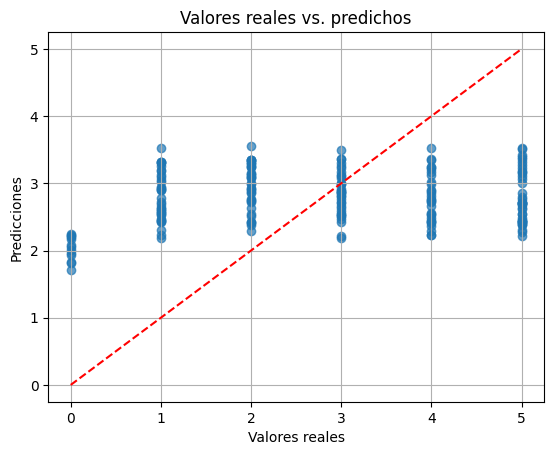

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. predichos")
plt.grid(True)
plt.show()

## ✅ Repite estos pasos con otros datasets como:

1) Concrete compressive strenght (UCI): https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
2) Energy Efficiency (UCI): https://archive.ics.uci.edu/ml/datasets/Energy+efficiency
3) Crop recommendation dataset: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset  (regresión logística)

